In [2]:
import numpy as np
import pandas as pd

col_types = {'Overall': np.int32, 'Age': np.int32}
df = pd.read_csv('../datasets/fifa19_complete_player_dataset.csv', 
                 usecols=['Name', 'Photo', 'Value', 'Overall', 'Age', 'Finishing', 
                          'Potential', 'Club', 'Wage', 'International Reputation', 
                          'Jersey Number', 'Special', 'Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve',
                          'FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                          'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
                          'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving',
                          'GKHandling','GKKicking','GKPositioning','GKReflexes',
                          'Skill Moves', 'Position', 'Joined', 'Body Type'], dtype=col_types)

# Remove € character, leave just numbers
df['Value'] = df['Value'].str.replace('€', '')
df['Wage'] = df['Wage'].str.replace('€', '')
df.head()

# Parse string for millions and thousands to numeric values
def parseValue(strVal):
    if 'M' in strVal:
        return int(float(strVal.replace('M', ''))*1000000)
    elif 'K' in strVal:
        return int(float(strVal.replace('K', ''))*1000)
    return int(strVal)

df['Value'] = df['Value'].apply(lambda x: parseValue(x))
df['Wage'] = df['Wage'].apply(lambda x: parseValue(x))
df.sample(5)

,Name,Age,Photo,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
11176,K. Rendón,25,https://cdn.sofifa.org/players/4/19/215338.png,64,69,Itagüí Leones FC,600000,1000,1794,1.0,...,60.0,62.0,42.0,58.0,55.0,11.0,11.0,7.0,8.0,6.0
13321,P. Mingoia,26,https://cdn.sofifa.org/players/4/19/199499.png,62,62,Accrington Stanley,325000,1000,1665,1.0,...,50.0,54.0,50.0,34.0,36.0,9.0,15.0,7.0,16.0,10.0
10877,C. Ohene,24,https://cdn.sofifa.org/players/4/19/244968.png,65,68,Ohod Club,575000,4000,1766,1.0,...,43.0,59.0,60.0,63.0,56.0,12.0,10.0,8.0,7.0,15.0
2783,Ailton Valpaços,26,https://cdn.sofifa.org/players/4/19/230222.png,73,73,Atlético Mineiro,3500000,24000,1867,1.0,...,50.0,72.0,70.0,75.0,77.0,8.0,13.0,9.0,9.0,10.0
13971,J. Robinson,24,https://cdn.sofifa.org/players/4/19/221447.png,61,66,DC United,290000,1000,1407,1.0,...,39.0,46.0,60.0,63.0,59.0,15.0,8.0,11.0,14.0,10.0


In [3]:
# Check if there are null/missing values and how many in each column
df.isnull().sum() 

Name                           0
Age                            0
Photo                          0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Special                        0
International Reputation      48
Skill Moves                   48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Acceleration                  48
SprintSpeed                   48
Agility                       48
Reactions                     48
Balance                       48
ShotPower 

In [5]:
def between_1_and_99(s):
    try: 
        n = int(s)
        return (n >= 1 and n <= 99)
    except ValueError:
        return False

In [6]:
# 48 values for 'Finishing' are null, removes these players
# Remove not valid entries for Finishing
df = df.loc[df.Finishing.apply(lambda x: between_1_and_99(x))]

# 241 values for 'Club' are null, removes these players
df = df.dropna() # Drops alle rows that contain at least one NaN-value
# Now check again
df.isnull().sum()

Name                        0
Age                         0
Photo                       0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
International Reputation    0
Skill Moves                 0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength  

In [255]:
# Now we can define Finishing as an integer
df['Finishing'] = df['Finishing'].astype('int')
# Some players have 'Value' = 0, removing these
df = df.loc[df.Value > 0]

In [151]:
df.describe()

,Age,Overall,Potential,Value,Finishing
count,17907.000000,17907.000000,17907.000000,1.790700e+04,17907.000000
mean,25.095605,66.239571,71.335232,2.450133e+06,45.586698
std,4.660388,6.926818,6.137251,5.633207e+06,19.511503
min,16.000000,46.000000,48.000000,1.000000e+04,2.000000
25%,21.000000,62.000000,67.000000,3.250000e+05,30.000000
50%,25.000000,66.000000,71.000000,7.000000e+05,49.000000
75%,28.000000,71.000000,75.000000,2.100000e+06,62.000000
max,45.000000,94.000000,95.000000,1.185000e+08,95.000000


In [152]:
df.Overall.describe()

count    17907.000000
mean        66.239571
std          6.926818
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [153]:
df.Finishing.describe()

count    17907.000000
mean        45.586698
std         19.511503
min          2.000000
25%         30.000000
50%         49.000000
75%         62.000000
max         95.000000
Name: Finishing, dtype: float64

In [154]:
df.nlargest(5, columns='Overall')

,Name,Age,Photo,Overall,Potential,Club,Value,Finishing
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,94,94,FC Barcelona,110500000,95
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,94,94,Juventus,77000000,94
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,92,93,Paris Saint-Germain,118500000,87
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,91,93,Manchester United,72000000,13
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,91,92,Manchester City,102000000,82


In [155]:
df.nsmallest(5, columns='Overall')

,Name,Age,Photo,Overall,Potential,Club,Value,Finishing
18206,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,46,66,Tranmere Rovers,60000,34
18186,Zhang Yufeng,20,https://cdn.sofifa.org/players/4/19/240917.png,47,64,Beijing Renhe FC,60000,29
18187,C. Ehlich,19,https://cdn.sofifa.org/players/4/19/240158.png,47,59,SpVgg Unterhaching,40000,40
18188,L. Collins,17,https://cdn.sofifa.org/players/4/19/240927.png,47,62,Newport County,60000,38
18189,A. Kaltner,18,https://cdn.sofifa.org/players/4/19/240160.png,47,61,SpVgg Unterhaching,60000,48


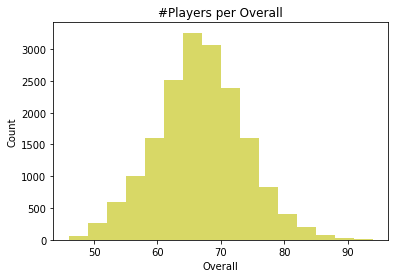

In [156]:
import matplotlib.pyplot as plt
plt.hist(df.Overall, bins=16, alpha=0.6, color='y')
plt.title("#Players per Overall")
plt.xlabel("Overall")
plt.ylabel("Count")
plt.show()

c:\users\axelh\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, '#Players per Overall, Fit results: mean = 66.24,  std = 6.93')

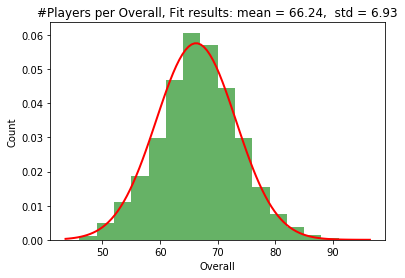

In [157]:
overall_mean = df.Overall.mean()
overall_std = df.Overall.std()

# Plot the histogram
plt.hist(df.Overall, bins=16, normed=True, alpha=0.6, color='g')
plt.title("#Players per Overall")
plt.xlabel("Overall")
plt.ylabel("Count")

from scipy.stats import norm
# Plot the probability density function for norm
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
plt.plot(x, p, 'k', linewidth=2, color='r')
title = "#Players per Overall, Fit results: mean = %.2f,  std = %.2f" % (overall_mean, overall_std)
plt.title(title)


In [158]:
# * * * MACHINE LEARNING ALGORITHMS FOR BUILDING PREDICTIVE MODEL * * * 
# Splitting our dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=99)

xtrain = train[['Value']]
ytrain = train[['Overall']]

xtest = test[['Value']]
ytest = test[['Overall']]

len(train)/len(df), len(test)/(len(df)) # Approximately 80-20 split


(0.7999664935500084, 0.20003350644999163)

In [159]:
# * LINEAR REGRESSION *
# Create linear regression object
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [160]:
# Make predictions using the testing set
y_pred = regr.predict(xtest)

Text(0, 0.5, 'Overall')

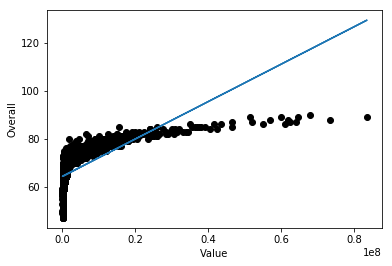

In [161]:
plt.scatter(xtest, ytest, color='black')
plt.plot(xtest, y_pred)
plt.xlabel("Value")
plt.ylabel("Overall")

In [162]:
# It doesn't look to good, but for most players it is actually not to bad

# Get row from playername
def getRow(player):
    try:
        return df.loc[df['Name'] == player]
    except:
        print("Error when getting row")

# Predict Overall with linear regression
def predictOverall_rg(player):
    try:
        row = getRow(player)
        value = row.values[0][4]
        return regr.predict([[value]])[0][0]
        #return "Predicted overall for " + str(player) + ": " + str(regr.coef_[0][0]*value + regr.intercept_[0])
    except:
        print("Error when predicting overall for ", player)
    
# Get true overall for player
def getOverall(player):
    try:
        row = getRow(player)
        return row.values[0][3]
    except:
        print("Error when getting row")

# Gives around 4, which is not to bad at all
def getMeanError():
    count = 0
    error = 0
    for p in df.iterrows():
        name = p[1][0]
        overall = p[1][3]
        value = p[1][4]
        pred_overall = regr.predict([[value]])[0][0]
        error += abs(pred_overall - overall)
        count += 1
    return error/count

# Two more common methods for evaluation a regression model is mean square error (MSE) and r2 score.
# Want low values for MSE, high for r2
import numpy as np # Linear algebra
from sklearn.metrics import mean_squared_error, r2_score #common metris to evaluate regression models
 
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pred))
 
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, y_pred))

Mean squared error: 28.93
Variance score: 0.41


In [163]:
# Time to decide whether this model is good enough for an initial app prototype. 
# If it’s not the case, you will identify other algorithms and techniques to see if you can improve the initial model.
# Decides it needs improvement

c:\users\axelh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.48925e-98): result may not be accurate.
  overwrite_a=True).T


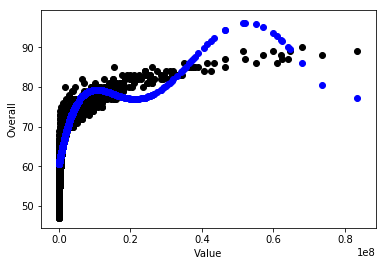

In [164]:
# * * POLYNOMIAL INTERPOLATION * * 
# We assume that the data points in our dataset are points of a complex math function. 
# Our goal is to find a polynomial that fits the curve of that function quite well.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pol = make_pipeline(PolynomialFeatures(6), linear_model.Ridge())
pol.fit(xtrain, ytrain)
y_pol = pol.predict(xtest)
plt.scatter(xtest, ytest,  color='black')
plt.scatter(xtest, y_pol,  color='blue')
plt.xlabel("Value")
plt.ylabel("Overall")
plt.show()



In [165]:
# Visually the polynomial regression looks better than the standard linear regression. Let's see how good
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pol))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, y_pol))

Mean squared error: 12.64
Variance score: 0.74


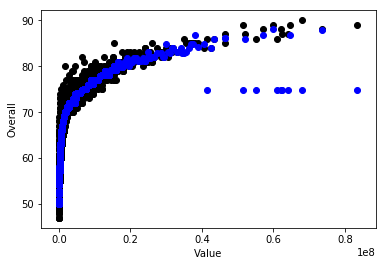

In [166]:
# * * SUPPORT VECTOR MACHINE * *
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', gamma=1e-3, C=100, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())
y_rbf = svr_rbf.predict(xtest)

plt.scatter(xtest, ytest,  color='black')
plt.scatter(xtest, y_rbf,  color='blue')
plt.xlabel("Value")
plt.ylabel("Overall")
plt.show()

In [25]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_rbf))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, y_rbf))

Mean squared error: 5.48
Variance score: 0.89


In [29]:
# * * NEURAL NETWORK * * 
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,22 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,10 days
H2O cluster name:,H2O_from_python_axelh_feiq8f
H2O cluster total nodes:,1
H2O cluster free memory:,1.977 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [275]:
# Saving pandas.DataFrame to csv
df.to_csv("../datasets/fifa19_panda.csv")

# Preparing the data
data = h2o.import_file("../datasets/fifa19_panda.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [287]:
y = "Overall" # Name of the field we want to learn 
x = data.names # Names of the fields we want to learn from 
x.remove(y)
x.remove('C1')
x.remove('Photo')
x.remove('Name') 
x.remove('Finishing')
#x.remove('International Reputation')
x.remove('Club')
print("That leaves us with the features: ", x)
train, test = data.split_frame([0.8])


That leaves us with the features:  ['Age', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Skill Moves', 'Body Type', 'Position', 'Jersey Number', 'Joined', 'Crossing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [277]:
# Training the model
m = h2o.estimators.deeplearning.H2ODeepLearningEstimator()
m.train(x, y, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [278]:
p = m.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [279]:
pred_vs_correct = p["predict"].cbind(test["Overall"]).as_data_frame()
pred_vs_correct

,predict,Overall
0,92.772476,94
1,90.579195,90
2,91.231956,90
3,88.399186,89
4,89.106238,89
5,89.536500,89
6,87.937742,88
7,87.983724,88
8,88.712686,88
9,85.625145,88


In [280]:
# The mean squared error
print("Mean squared error: %.2f" % m.mse())

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % m.r2())

Mean squared error: 1.23
Variance score: 0.98


In [281]:
m

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1551132900943_15


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 1.2257346686652504
RMSE: 1.1071290207854052
MAE: 0.7519725527197486
RMSLE: 0.01882749692324447
Mean Residual Deviance: 1.2257346686652504
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
,2019-02-26 01:02:51,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2019-02-26 01:02:55,5.402 sec,1808 obs/sec,0.4971441,1,6615.0,3.1036384,9.6325714,2.2334871,0.8045955
,2019-02-26 01:03:12,22.353 sec,2801 obs/sec,3.9970690,8,53185.0,1.3678231,1.8709399,0.9073638,0.9620465
,2019-02-26 01:03:29,39.248 sec,3318 obs/sec,8.5154066,17,113306.0,1.1071290,1.2257347,0.7519726,0.9751350
,2019-02-26 01:03:35,45.268 sec,3464 obs/sec,10.0232226,20,133369.0,1.2422613,1.5432133,0.9159235,0.9686947
,2019-02-26 01:03:37,47.184 sec,3458 obs/sec,10.0232226,20,133369.0,1.1071290,1.2257347,0.7519726,0.9751350


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Value,1.0,1.0,0.0037928
Potential,0.6549425,0.6549425,0.0024841
Age,0.5646764,0.5646764,0.0021417
Interceptions,0.3012265,0.3012265,0.0011425
Position.CM,0.2908793,0.2908793,0.0011032
---,---,---,---
"Joined.Oct 7, 2016",0.1245783,0.1245783,0.0004725
"Joined.Oct 26, 2017",0.1242213,0.1242213,0.0004711
Joined.missing(NA),0.0,0.0,0.0
Position.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [282]:
m.model_performance() # show the performance on the training data


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 1.2257346686652504
RMSE: 1.1071290207854052
MAE: 0.7519725527197486
RMSLE: 0.01882749692324447
Mean Residual Deviance: 1.2257346686652504


In [283]:
m.model_performance(test_data=test) # score and compute new metrics on the test data!


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 1.3896175793625576
RMSE: 1.1788204186230222
MAE: 0.7957542548722891
RMSLE: 0.01998790258673087
Mean Residual Deviance: 1.3896175793625576


Text(0.5, 1.0, 'Heatmap of correlations')

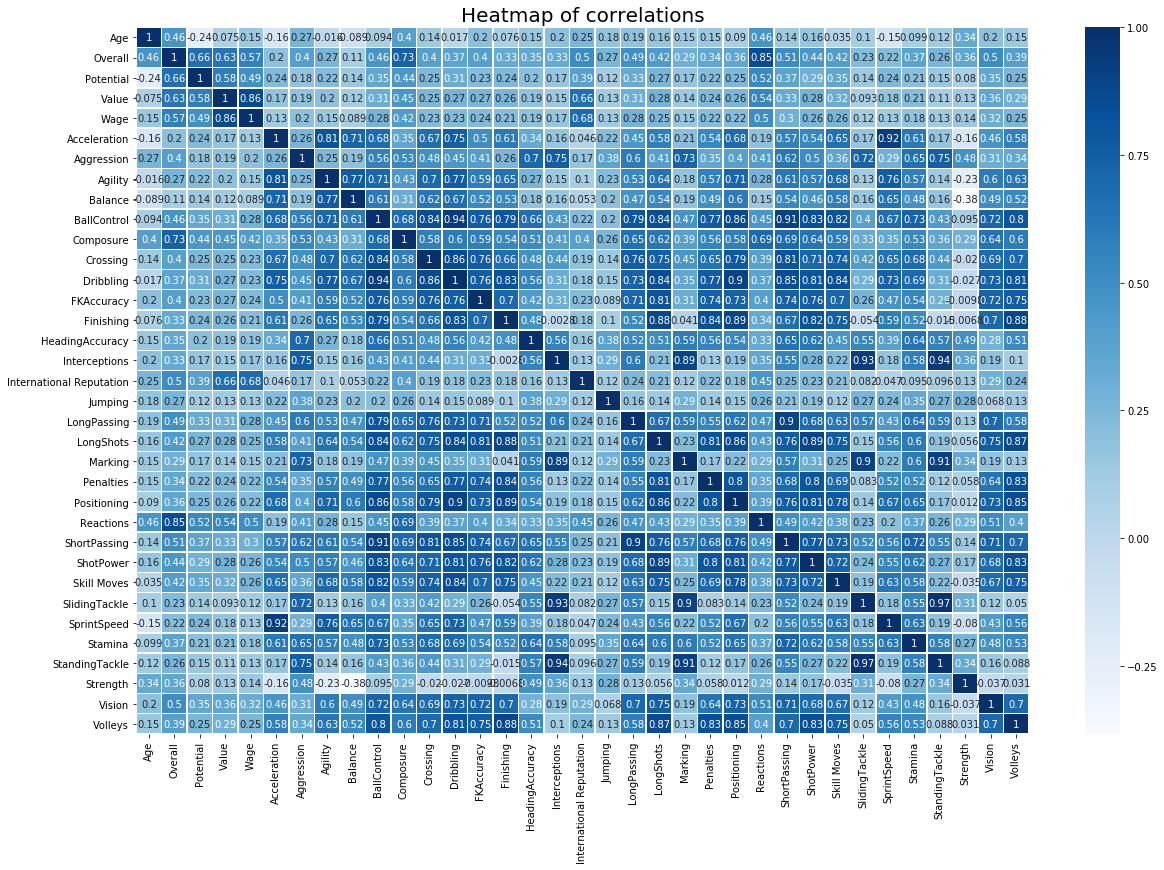

In [300]:
# Check how the different columns correlates to eachother
# Example longshots vs volleys (expects a close correlation)
#df['Overall'].corr(df['Value'])
df.corr() # Gives correlation between ll columns vs all columns

# Making a correlation heatmap for all columns vs all colums
plt.rcParams['figure.figsize'] = (20, 13)

# Selects the columns I want to see the correlation heatmap for
new_df = df[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning', 'Reactions',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']]

import seaborn as sns
hm = sns.heatmap(new_df.corr(), annot=True, linewidth=.5, cmap='Blues')
hm.set_title(label='Heatmap of correlations', fontsize=20)

In [297]:
# Interested in correlations greater than 0.5
interesting_corrs = {}
for x in df.columns:

    if df[x].dtype == np.float64 or df[x].dtype == np.int32 or df[x].dtype == np.int64:
        corr = df['Overall'].corr(df[x])
        if corr >= 0.5:
            interesting_corrs[('Overall', x)] = corr

interesting_corrs

{('Overall', 'Overall'): 1.0,
 ('Overall', 'Potential'): 0.66380187237926369,
 ('Overall', 'Value'): 0.62890691777936636,
 ('Overall', 'Wage'): 0.57372984190209653,
 ('Overall', 'Special'): 0.61076158604266129,
 ('Overall', 'International Reputation'): 0.50333340900868762,
 ('Overall', 'ShortPassing'): 0.50574476553735903,
 ('Overall', 'Reactions'): 0.85378352214398157,
 ('Overall', 'Vision'): 0.50482307061032594,
 ('Overall', 'Composure'): 0.73234798108665311}